In [366]:
import os
import re
import fitz
import pandas as pd
import numpy as np
from sklearn import svm
from sklearn.svm import SVC
import matplotlib.pyplot as plt
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
from tensorflow.keras.preprocessing.text import one_hot
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Flatten,Embedding 
from tensorflow.keras import Sequential
import seaborn as sns
from nltk.tokenize import sent_tokenize,word_tokenize 

In [530]:
path_h='E:\GAGAN_ASSIGNMENT\ASSIGNMENT\HISTORY'
history=''

files=os.listdir(path_h)
for file in files:
    f_path=os.path.join(path_h,file)
    pdf=fitz.open(f_path)
    pages=pdf.page_count
    for i in range(pages):
        page_text=pdf.load_page(i)
        text=page_text.get_text()
        history=history+text
        
        
    

In [531]:
science=' ' 
path_h='E:\GAGAN_ASSIGNMENT\ASSIGNMENT\SCIENCE'

files=os.listdir(path_h)
for file in files:
    f_path=os.path.join(path_h,file)
    pdf=fitz.open(f_path)
    pages=pdf.page_count
    for i in range(pages):
        page_text=pdf.load_page(i)
        text=page_text.get_text()
        science=science+text
        
        

In [532]:
def cleaned(text):
    cleaned_text=re.sub('/(\r\n)+|\r+|\n+|\t+/','',text)       #removes lines 
    cleaned_text=re.sub('(https?:\/\/)?([\da-z\.-]+)\.([a-z\.]{2,6})([\/\w \.-]*)','',cleaned_text)  #removes links
    cleaned_text=re.sub('\d+\.','',cleaned_text)       #removes question number
    cleaned_text=re.sub('\(?[a-zA-Z0-9]+?\)','',cleaned_text)   #removes brackets 
    cleaned_text=re.sub('\[?[a-zA-Z0-9]+?\]','',cleaned_text)  #removes brackets 
    cleaned_text=re.sub('\s[a-zA-Z0-9]\s','',cleaned_text)   #removes single characters 
    return cleaned_text
science=cleaned(science.lower())
history=cleaned(history.lower())

In [533]:

history=sent_tokenize(history)    #sentence tokenizer
science=sent_tokenize(science)   #sentence tokenizer

h_label=['h']*len(history)     #marks lables
s_label=['S']*len(science)

In [534]:
len(science),len(s_label),len(h_label),len(history)

(232, 232, 370, 370)

In [535]:
features=np.concatenate([science,history])   #features 
labels=np.concatenate([s_label,h_label])  #labels 

In [536]:
data=pd.DataFrame({'Question':features,'Class':labels})
data= data.sample(frac = 1)

In [539]:
data.head()

,Question,Class
209,discuss the initiatives that can propel resear...,S
389,it is associated with which of the following p...,h
69,candidates can download the notes on the topic...,S
560,tula bali niskha rupiyashow answershow answ...,h
360,they are famous for their dance which is an in...,h


In [538]:
data.iloc[10:18,]

,Question,Class
297,andonly only all the above only which of th...,h
62,location identification ofperson sleep monito...,S
11,carbon nanotubes are biodegradable.,S
568,fruits tax liquor tax emergency tax sales ta...,h
580,they issuedlarge number of silver coins called...,h
452,no regular army was maintained.,h
110,roll-up displays embedded in clothing can be m...,S
475,early jaina literature was written in sanskrit.,h


In [540]:
y=data['Class'].astype('category').cat.codes.values            #convers classes into codes 
y[:10]

array([0, 1, 0, 1, 1, 1, 1, 1, 1, 0], dtype=int8)

In [541]:
maxlen=max(list(map(lambda x : len(x.split(' ')),features)))    #max word in a sentence it will 
maxlen

160

Method1 :word embedding with keras embedded layer

In [542]:
encoded= [ one_hot(x,600) for x in data['Question']]
vectors_features=pad_sequences(encoded,maxlen=maxlen,padding='post')
print(vectors_features.shape)
vectors_features

(602, 160)


array([[ 14, 381, 437, ...,   0,   0,   0],
       [ 93, 552, 415, ...,   0,   0,   0],
       [292, 289, 316, ...,   0,   0,   0],
       ...,
       [ 59, 231, 580, ...,   0,   0,   0],
       [381, 398, 345, ...,   0,   0,   0],
       [553, 552, 123, ...,   0,   0,   0]])

In [543]:
X_train ,X_test,y_train,y_test=train_test_split(vectors_features,y,test_size=0.2,random_state=200)     
X_train.shape,y_train.shape,X_test.shape,y_test.shape

((481, 160), (481,), (121, 160), (121,))

implementing the models  

In [544]:
vocab_size=600
embeded_vector_size=100
model_cnn=Sequential()                
model_cnn.add(Embedding(vocab_size,embeded_vector_size,input_length=maxlen))
model_cnn.add(Flatten())
model_cnn.add(Dense(128,activation='relu'))
model_cnn.add(Dense(32,activation='relu'))
model_cnn.add(Dense(1,activation='sigmoid'))

In [545]:
model_cnn.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])
model_cnn.fit(X_train,y_train,epochs=50)
loss,acc_cnn = model_cnn.evaluate(X_test, y_test,batch_size=32, verbose=0)
loss,acc_cnn

Train on 481 samples
Epoch 1/50
481/481 [==============================] - 1s 3ms/sample - loss: 0.7229 - accuracy: 0.5904
Epoch 2/50
481/481 [==============================] - 1s 1ms/sample - loss: 0.6636 - accuracy: 0.6216
Epoch 3/50
481/481 [==============================] - 1s 1ms/sample - loss: 0.6591 - accuracy: 0.5780
Epoch 4/50
481/481 [==============================] - 1s 1ms/sample - loss: 0.5365 - accuracy: 0.7609
Epoch 5/50
481/481 [==============================] - 1s 1ms/sample - loss: 0.3804 - accuracy: 0.8773
Epoch 6/50
481/481 [==============================] - 1s 1ms/sample - loss: 0.2128 - accuracy: 0.9480
Epoch 7/50
481/481 [==============================] - 1s 1ms/sample - loss: 0.1143 - accuracy: 0.9688
Epoch 8/50
481/481 [==============================] - 1s 1ms/sample - loss: 0.0693 - accuracy: 0.9751
Epoch 9/50
481/481 [==============================] - 1s 1ms/sample - loss: 0.0599 - accuracy: 0.9771
Epoch 10/50
481/481 [==============================] - 1s 1ms

(0.5486859772816177, 0.8016529)

Support Vector Classifier


In [546]:
svc=SVC()              
model_svc=svc.fit(X_train,y_train)
pred_svc=model_svc.predict(X_test)
acc_svc=accuracy_score(y_test,pred_svc)
print('SVC:',acc_svc)

SVC: 0.6363636363636364


Logistic Regression 

In [547]:
Lgr=LogisticRegression()
model_lgr=Lgr.fit(X_train,y_train)
pred_lgr=model_lgr.predict(X_test)
acc_lgr=accuracy_score(y_test,pred_lgr)
print('LogisticRegression:',acc_lgr)

LogisticRegression: 0.5206611570247934


e:\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



KNeighborsClassifier

In [553]:
knn=KNeighborsClassifier()
model_knn=knn.fit(X_train,y_train)
pred_knn=model_knn.predict(X_test)
acc_knn=accuracy_score(y_test,pred_knn)
print('KNN:',acc_knn)

KNN: 0.5785123966942148


In [552]:
DTclf = DecisionTreeClassifier()
model_DTclf = DTclf.fit(X_train,y_train)
pred_DTclf = model_DTclf.predict(X_test)
acc_DTclf=accuracy_score(y_test,pred_DTclf)
print('DecisionTreeClassifier:',acc_DTclf)


DecisionTreeClassifier: 0.6033057851239669


In [550]:
gnb = GaussianNB()
model_gnb=gnb.fit(X_train, y_train)
pred_gnb=model_gnb.predict(X_test)
acc_gnb=accuracy_score(y_test,pred_gnb)
print('GaussianNB:',acc_gnb)

GaussianNB: 0.6446280991735537


In [ ]:
X_train.shape,y_train.shape,X_test.shape,y_test.shape

[Text(0.5, 0, 'models'), Text(0, 0.5, 'accuracy ')]

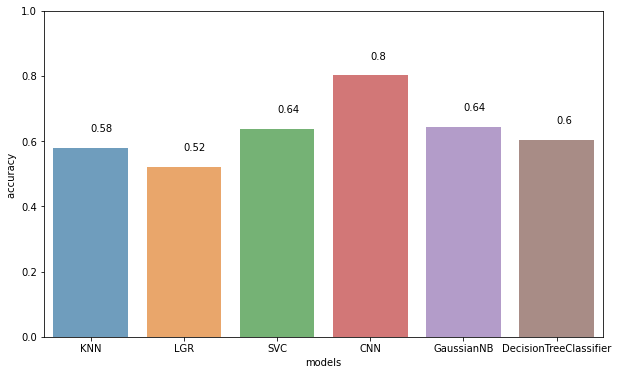

In [554]:
plt_y=[acc_knn,acc_lgr,acc_svc, acc_cnn,acc_gnb,acc_DTclf]
plt_x=['KNN','LGR','SVC', 'CNN','GaussianNB','DecisionTreeClassifier']

x_axis=range(len(plt_x))
plt.figure(figsize=(15,6))
ax=sns.barplot(x=plt_x,y=plt_y,alpha=0.7)
ax.set_ylim([0,1])
for x,y in zip(x_axis,plt_y):
    ax.text(x,y+.05,round(y,2))
ax.set_box_aspect(3.5/len(ax.patches))
ax.set(xlabel='models', ylabel='accuracy ')

METHOD 2

 Count Vectors as features

In [555]:
from sklearn.feature_extraction.text import CountVectorizer  
cv=CountVectorizer(max_features=160)             ##convert sentences into vector representation 
x2=cv.fit_transform(data['Question']).toarray()         #return array of vectors 
y2=data['Class'].astype('category').cat.codes.values            #convers classes into codes 

In [ ]:
x

In [556]:
x2.shape,y2.shape

((602, 160), (602,))

In [557]:

X_train2 ,X_test2,y_train2,y_test2=train_test_split(x2,y2,test_size=0.2,random_state=2)       

SUPPOR VECTOR CLASSIFIER

In [558]:
svc=SVC()
model_svc2=svc.fit(X_train2,y_train2)
pred_svc2=model_svc2.predict(X_test2)
acc_svc2=accuracy_score(y_test2,pred_svc2)
acc_svc2

0.768595041322314

RandomForestClassifier

In [559]:

rfc2=RandomForestClassifier()
model_rfc2=rfc2.fit(X_train2,y_train2)
pred_rfc2=model_rfc2.predict(X_test2)
acc_rfc2=accuracy_score(y_test2,pred_rfc2)
acc_rfc2

0.8181818181818182

KNeighborsClassifier

In [560]:
from sklearn.neighbors import KNeighborsClassifier
knn2=KNeighborsClassifier()
model_knn2=knn2.fit(X_train2,y_train2)
pred_knn2=model_knn2.predict(X_test2)
acc_knn2=accuracy_score(y_test2,pred_knn2)
acc_knn2

0.71900826446281

In [561]:
from sklearn.linear_model import LogisticRegression 
Lgr2=LogisticRegression()
model_lgr2=Lgr2.fit(X_train2,y_train2)
pred_lgr2=model_lgr2.predict(X_test2)
acc_lgr2=accuracy_score(y_test2,pred_lgr2)
acc_lgr2


0.8264462809917356

In [562]:
from  tensorflow.keras import layers,Sequential
from tensorflow import keras
model_cnn2=Sequential()
model_cnn2.add(Dense(128,activation='relu'))
model_cnn2.add(Dense(32,activation='relu'))
model_cnn2.add(Dense(1,activation='sigmoid'))
model_cnn2.compile(optimizer ='adam',loss ='binary_crossentropy',metrics =['accuracy'])

In [563]:
model_cnn2.fit ( X_train2 , y_train2 , epochs =20)

loss2,acc_cnn2 = model_cnn2.evaluate(X_test2, y_test2, verbose=0)

loss2,acc_cnn2

Train on 481 samples
Epoch 1/20
481/481 [==============================] - 1s 1ms/sample - loss: 0.6333 - accuracy: 0.6466
Epoch 2/20
481/481 [==============================] - 0s 104us/sample - loss: 0.5408 - accuracy: 0.8025
Epoch 3/20
481/481 [==============================] - 0s 83us/sample - loss: 0.4652 - accuracy: 0.8274
Epoch 4/20
481/481 [==============================] - 0s 106us/sample - loss: 0.4030 - accuracy: 0.8482
Epoch 5/20
481/481 [==============================] - 0s 100us/sample - loss: 0.3468 - accuracy: 0.8753
Epoch 6/20
481/481 [==============================] - 0s 94us/sample - loss: 0.3035 - accuracy: 0.8815
Epoch 7/20
481/481 [==============================] - 0s 114us/sample - loss: 0.2653 - accuracy: 0.8898
Epoch 8/20
481/481 [==============================] - 0s 92us/sample - loss: 0.2440 - accuracy: 0.9106
Epoch 9/20
481/481 [==============================] - 0s 112us/sample - loss: 0.2218 - accuracy: 0.9002
Epoch 10/20
481/481 [===========================

(0.404276921729411, 0.8512397)

In [564]:
gnb2 = GaussianNB()
model_gnb2=gnb2.fit(X_train2, y_train2)
pred_gnb2=model_gnb2.predict(X_test2)
acc_gnb2=accuracy_score(y_test2,pred_gnb2)
print('gnb2:',acc_gnb2)

gnb2: 0.6694214876033058


In [565]:
DTclf2 = DecisionTreeClassifier()
model_DTclf2 = DTclf2.fit(X_train2,y_train2)
pred_DTclf2 = model_DTclf2.predict(X_test2)
acc_DTclf2=accuracy_score(y_test2,pred_DTclf2)
print('DTclf2:',acc_DTclf2)


DTclf2: 0.7603305785123967


[Text(0.5, 0, 'models'), Text(0, 0.5, 'accuracy ')]

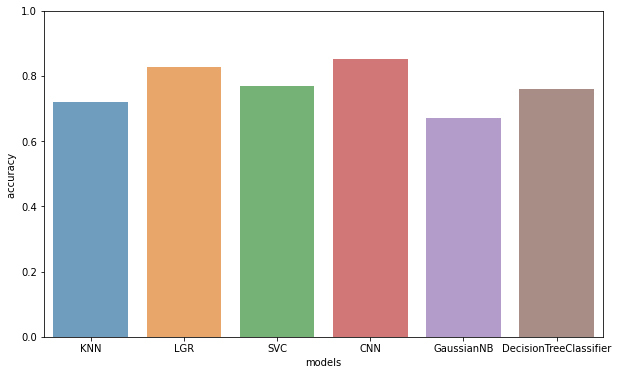

In [566]:
plt_y2=[acc_knn2,acc_lgr2,acc_svc2, acc_cnn2,acc_gnb2,acc_DTclf2]
plt_x2=['KNN','LGR','SVC', 'CNN','GaussianNB','DecisionTreeClassifier']
x_axis2=range(len(plt_x2))
plt.figure(figsize=(15,6))
ax2=sns.barplot(x=plt_x2,y=plt_y2,alpha=0.7)
ax2.set_ylim([0,1])
for x,y in zip(x_axis2,plt_y2):
    ax.text(x,y+.05,round(y,2))
ax2.set_box_aspect(3.5/len(ax.patches))
ax2.set(xlabel='models', ylabel='accuracy ')

Comparing Model 1 and model 2

In [567]:
model_acc=pd.DataFrame({'Model1':plt_y,'Model2':plt_y2},index=plt_x)

In [568]:
model_acc

,Model1,Model2
KNN,0.578512,0.719008
LGR,0.520661,0.826446
SVC,0.636364,0.768595
CNN,0.801653,0.851240
GaussianNB,0.644628,0.669421
DecisionTreeClassifier,0.603306,0.760331


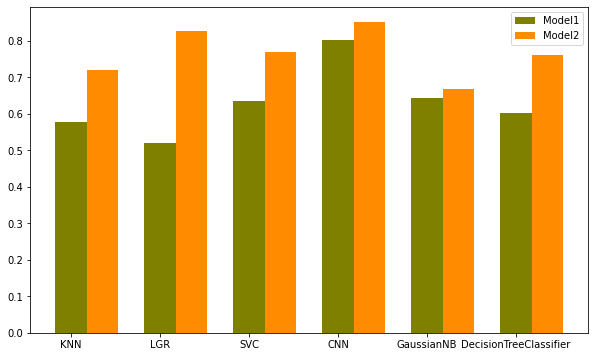

In [569]:
plt.figure(figsize=(10,6))
x_axis=np.arange(len(model_acc.index))+.35
plt.bar(x_axis,model_acc.Model1,width=0.35,color='olive')
plt.bar(x_axis+.35,model_acc.Model2,width=0.35,color='darkorange')
plt.xticks(x_axis,plt_x)

plt.legend(['Model1','Model2'])
plt.show()

Model Accuracy 

model 2 doing comparatively  better 

APPLYING models on another data

In [515]:
t=open(r'E:\Downloads\questions.txt')

In [516]:
lines=t.readlines()

In [517]:
features=[]
labels=[]
for x in lines:
    features.append(x.split(':')[1][:-3])
    labels.append(x.split(':')[0])

In [518]:
X=cv.fit_transform((features)).toarray()       #converting sentences into vectors 

In [519]:
df=pd.DataFrame(np.array(X))
df

,0,1,2,3,4,5,6,7,8,9,...,150,151,152,153,154,155,156,157,158,159
0,0,0,0,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,1,0,0,0,0,0,1,0,0,...,0,0,0,0,0,0,0,1,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5449,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5450,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [520]:
df['class']=labels

In [521]:
df['class']=df['class'].astype('category').cat.codes

In [522]:
x=df.iloc[:,:-1]

In [523]:
y=df['class'].values
y

array([1, 2, 1, ..., 5, 5, 2], dtype=int8)

In [524]:
from sklearn.preprocessing import StandardScaler
scaler=StandardScaler()
x = scaler.fit_transform(x)                   

In [525]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score
X_train ,X_test,y_train,y_test=train_test_split(x,y,test_size=0.2)

In [526]:
from sklearn.linear_model import LogisticRegression 
Lgr=LogisticRegression()
model=Lgr.fit(X_train,y_train)
pred=model.predict(X_test)
acc=accuracy_score(y_test,pred)
acc


e:\pythonproject\venv\lib\site-packages\sklearn\linear_model\_logistic.py:765: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)



0.9376718606782768

In [527]:
from sklearn.neighbors import KNeighborsClassifier
knn=KNeighborsClassifier()
model=knn.fit(X_train,y_train)
pred=model.predict(X_test)
acc=accuracy_score(y_test,pred)
acc


0.7983501374885427

In [528]:
from sklearn import svm
from sklearn.svm import SVC
svc=SVC()
model=svc.fit(X_train,y_train)
pred=model.predict(X_test)
acc=accuracy_score(y_test,pred)
acc

0.921173235563703